# Airline Analysis

- In this project, you’ll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. 
- You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.
 - You decide to look into your favorite airline. 
 - The data include:
    - `miles`: miles traveled through the flight
    - `passengers`: number of passengers on the flight
    - `delay`: take-off delay in minutes
    - `inflight_meal`: is there a meal included in the flight?
    - `inflight_entertainment`: are there free entertainment systems for each seat?
    - `inflight_wifi`: is there complimentary wifi on the flight?
    - `day_of_week`: day of the week of the flight
    - `weekend`: did this flight take place on a weekend
    - `coach_price`: the average price paid for a coach ticket
    - `firstclass_price`: the average price paid for first-class seats
    - `hours`: how many hours the flight took
    - `redeye`: was this flight a redeye (overnight)?
- In this project, you’ll explore a dataset for the first time and get to know each of these features. 
- Keep in mind that there’s no one right way to address each of these questions. 
- The goal is simply to explore and get to know the data using whatever methods come to mind.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [3]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


## 1.

- What do coach ticket prices look like? 
- What are the high and low values? 
- What would be considered average? 
- Does $500 seem like a good price for a coach ticket?

Max. Price: 593.635
Min. Price: 44.415
Mean Price: 376.58525308213905
Median Price: 380.56


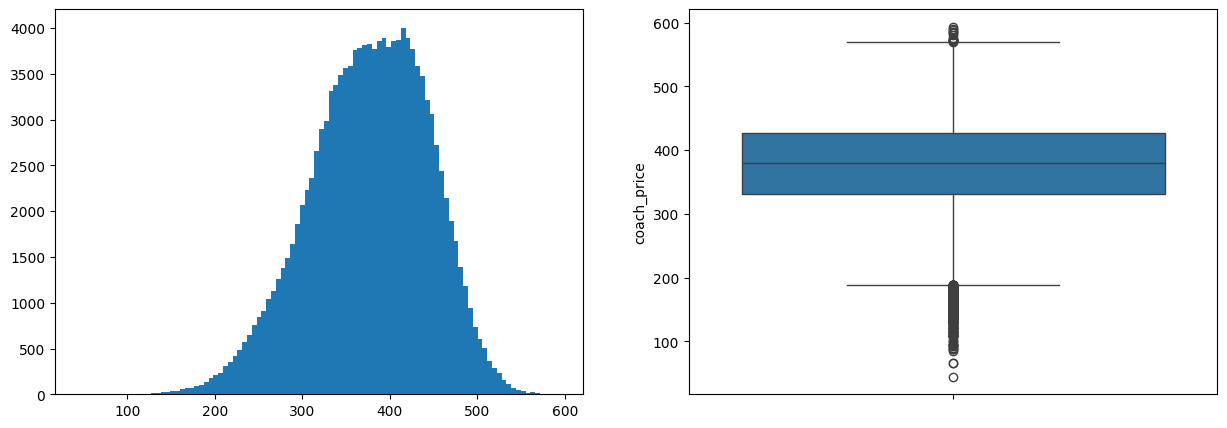

In [18]:
print(f"Max. Price: {flight.coach_price.max()}")
print(f"Min. Price: {flight.coach_price.min()}")
print(f"Mean Price: {flight.coach_price.mean()}")
print(f"Median Price: {flight.coach_price.median()}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(flight.coach_price, bins=100)
plt.subplot(1, 2, 2)
sns.boxplot(flight.coach_price)
plt.show()

In [15]:
# $500 is about the 75th percentile, so its expensive

## 2.

- Now visualize the coach ticket prices for flights that are 8 hours long.
- What are the high, low, and average prices for 8-hour-long flights? 
- Does a $500 ticket seem more reasonable than before?

Max. Price: 593.635
Min. Price: 170.77
Mean Price: 431.834377372817
Median Price: 437.115


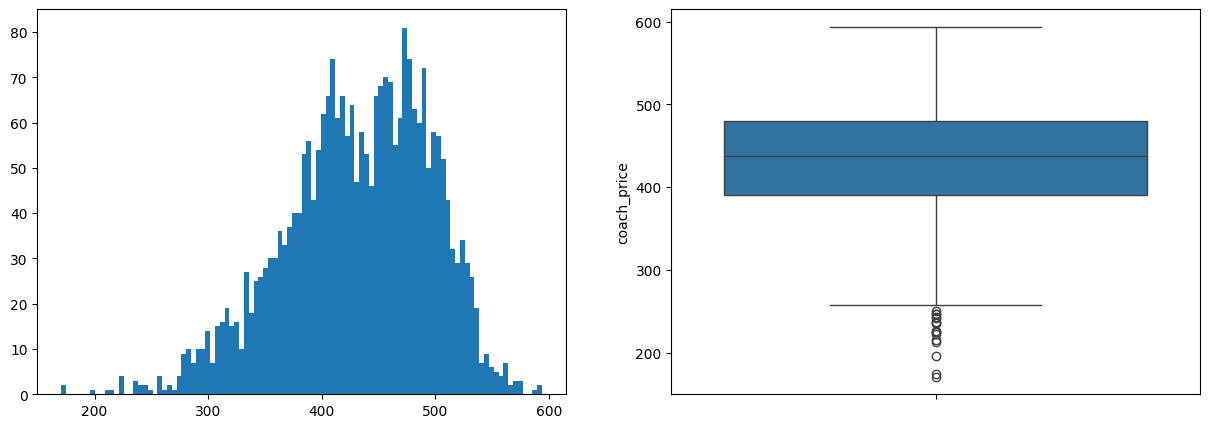

In [21]:
coach_price_8h = flight[flight.hours == 8]
print(f"Max. Price: {coach_price_8h.coach_price.max()}")
print(f"Min. Price: {coach_price_8h.coach_price.min()}")
print(f"Mean Price: {coach_price_8h.coach_price.mean()}")
print(f"Median Price: {coach_price_8h.coach_price.median()}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(coach_price_8h.coach_price, bins=100)
plt.subplot(1, 2, 2)
sns.boxplot(coach_price_8h.coach_price)
plt.show()

In [22]:
# $500 are closer to the center now.

## 3.

- How are flight delay times distributed? 
- Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. 
- You want to better understand how often there are large delays so you can correctly set up connecting flights.
- What kinds of delays are typical?

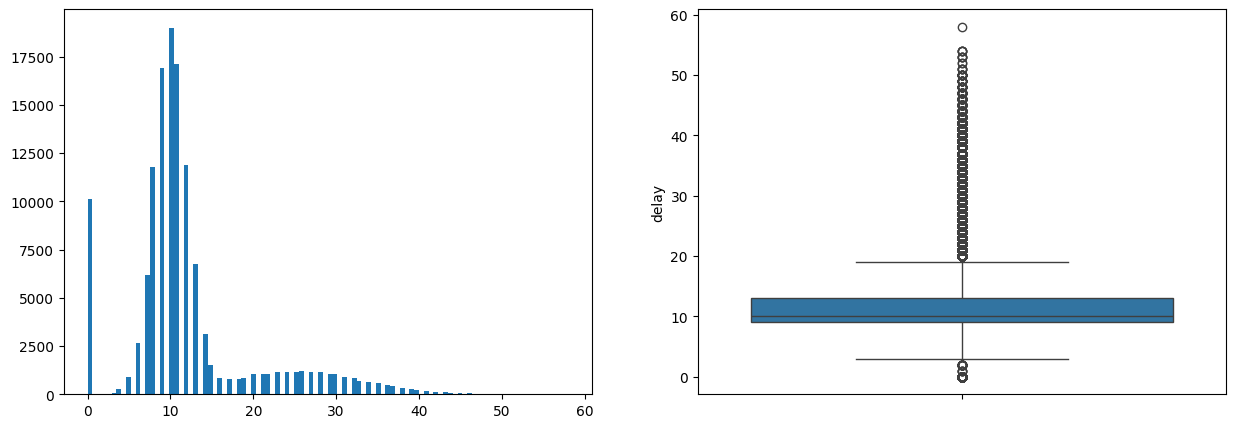

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(flight.delay[flight.delay <= 400], bins=100)
plt.subplot(1, 2, 2)
sns.boxplot(flight.delay[flight.delay <= 400])
plt.show()

## 4.

- Create a visualization that shows the relationship between coach and first-class prices. 
- What is the relationship between these two prices? 
- Do flights with higher coach prices always have higher first-class prices as well?

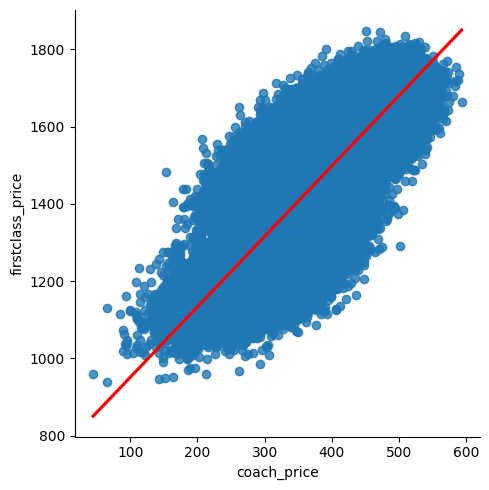

In [36]:
sns.lmplot(x="coach_price", y="firstclass_price", data=flight, line_kws={'color': 'red'})
plt.show()

In [31]:
# There is a positive correlation between coach and first class prices
# So higher coach prices are associated with higher first class prices

## 5.

- What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? 
- Which features are associated with the highest increase in price?

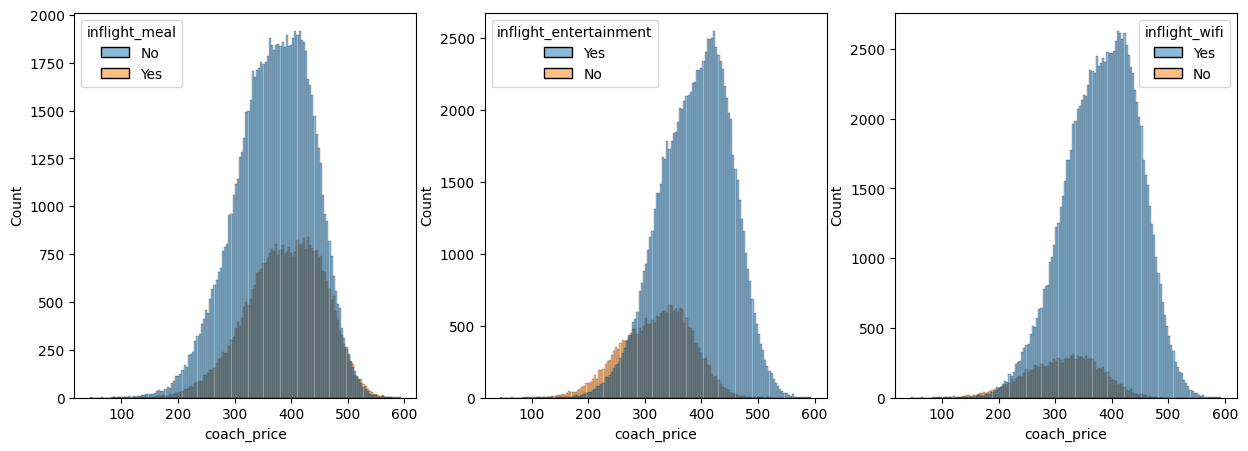

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=flight, x="coach_price", hue=flight.inflight_meal)
plt.subplot(1, 3, 2)
sns.histplot(data=flight, x="coach_price", hue=flight.inflight_entertainment)
plt.subplot(1, 3, 3)
sns.histplot(data=flight, x="coach_price", hue=flight.inflight_wifi)
plt.show()

## 6.

- How does the number of passengers change in relation to the length of flights?

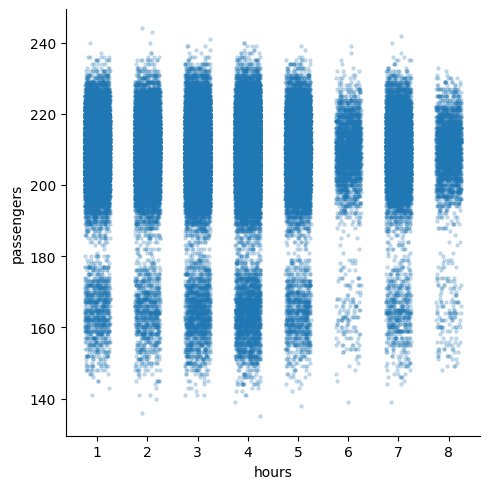

In [39]:
sns.lmplot(x = "hours", y = "passengers", data = flight, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()

## 7.

- Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

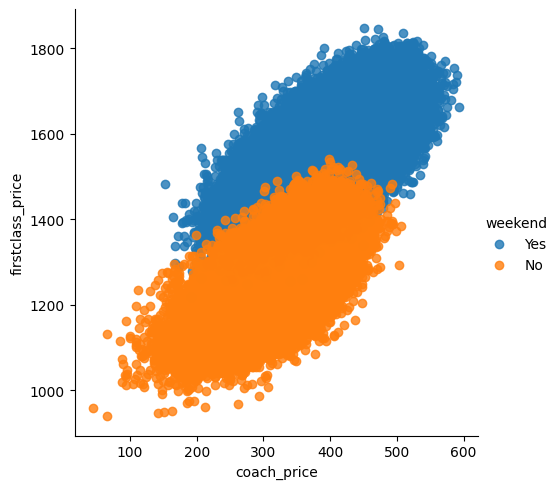

<Figure size 640x480 with 0 Axes>

In [40]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight, fit_reg= False)
plt.show()
plt.clf()

## 8.

- How do coach prices differ for redeyes and non-redeyes on each day of the week?

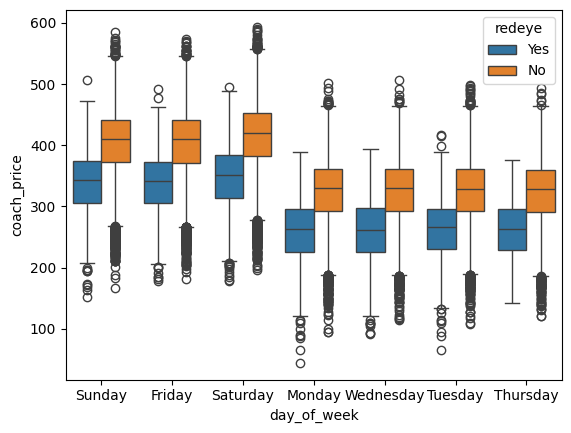

In [41]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()